In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
import pickle
from sklearn.impute import SimpleImputer

### Problem Statement

##### *Classify The Drug Based On their Features*

###  data collection

In [2]:
data = pd.read_csv(r"C:\Users\Sravanthi\Downloads\drug200.csv")

In [3]:
df=data.copy()

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## EDA(Exploratoty Data Analysis)

In [6]:
df.shape

(200, 6)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [47]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [48]:
df.duplicated().sum()

0

In [50]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [51]:
df['BP'].unique()

['HIGH', 'LOW', 'NORMAL']
Categories (3, object): ['HIGH', 'LOW', 'NORMAL']

In [9]:
df=df.astype(dtype = {'BP':'category','Cholesterol':'category'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [11]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [52]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [53]:
df['Cholesterol'].unique()

['HIGH', 'NORMAL']
Categories (2, object): ['HIGH', 'NORMAL']

##  preprocessing

In [13]:
feature_var = df[["Age","Sex","BP","Cholesterol","Na_to_K"]]                                            # feature_variable
class_var=df["Drug"]                                               # class_variable

In [14]:
feature_var.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [15]:
class_var

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [56]:
lb = LabelEncoder()   # give values in cv using the label encoder
class_var = lb.fit_transform(class_var)

In [57]:
class_var

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [ ]:
# EDA

In [59]:
# find the relation between features
# Correlation matrix
corr_matrix = feature_var.corr()
corr_matrix

C:\Users\Sravanthi\AppData\Local\Temp\ipykernel_7308\681963724.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = feature_var.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


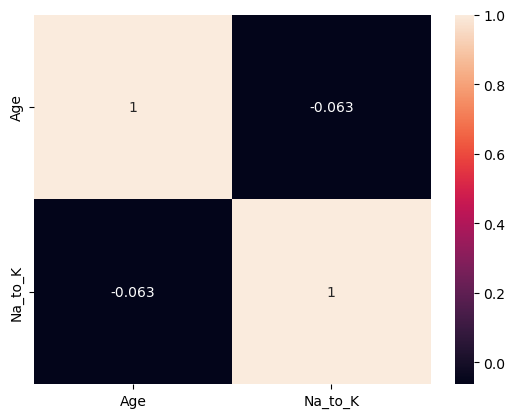

In [60]:
sns.heatmap(corr_matrix,annot=True) # find the relation between features
plt.show()

## Feature Engineering

In [63]:
# split the data into train and test based on fv and cv
x_train,x_test,y_train,y_test=train_test_split(feature_var,class_var,test_size=0.2,stratify = class_var)

In [64]:
numerical_data = x_train.select_dtypes(include=["int64","float64"])
categorical_data = x_train.select_dtypes(include=["object"])
ordinal_data =  x_train.select_dtypes(include=["category"])

In [65]:
ordinal_data

,BP,Cholesterol
109,NORMAL,HIGH
107,LOW,HIGH
127,NORMAL,NORMAL
9,LOW,NORMAL
62,LOW,NORMAL
...,...,...
28,LOW,NORMAL
126,HIGH,HIGH
130,NORMAL,HIGH
157,LOW,HIGH


In [66]:
num_p = Pipeline([("imp_n",SimpleImputer()),("scaling",StandardScaler())])

In [67]:
cat_p = Pipeline([("imp_n",SimpleImputer(strategy='most_frequent')),("ohe",OneHotEncoder(sparse_output=False,drop ="first"))])

In [68]:
ord_p = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [69]:
ctp = ColumnTransformer([("num",num_p,numerical_data.columns),("cat",cat_p,categorical_data.columns),(["ord",ord_p,ordinal_data.columns])],remainder="passthrough")

In [70]:
finalp =  Pipeline([("preprocess",ctp)]) 

In [71]:
finalp

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imp_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp_n',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ['ord',
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal_Encoding',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'LOW',
                                                                                               'HIGH'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']]))]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')]]))])

In [72]:
finalp.fit_transform(x_train)

array([[-1.28951797,  0.1435453 ,  1.        ,  0.        ,  1.        ],
       [-0.14928102,  0.60570734,  1.        ,  1.        ,  1.        ],
       [-0.56936832, -1.17222114,  1.        ,  0.        ,  0.        ],
       [-0.08926855,  0.51146311,  1.        ,  1.        ,  0.        ],
       [ 1.35103075,  0.70506561,  1.        ,  1.        ,  0.        ],
       [ 0.33081875, -0.52200896,  0.        ,  0.        ,  0.        ],
       [ 0.87093098, -0.792468  ,  0.        ,  1.        ,  1.        ],
       [-0.3893309 ,  2.04669441,  0.        ,  1.        ,  0.        ],
       [-1.10948055, -0.24950431,  0.        ,  1.        ,  1.        ],
       [-0.74940573,  1.47669942,  0.        ,  2.        ,  0.        ],
       [ 0.93094345, -0.84404663,  1.        ,  0.        ,  0.        ],
       [ 0.6308811 , -0.71458866,  0.        ,  2.        ,  1.        ],
       [-1.70960526, -0.56423623,  1.        ,  1.        ,  1.        ],
       [-0.98945561, -0.43667775,  0. 

In [73]:
x_train_fit = ctp.fit_transform(x_train)
x_test_trans = ctp.transform(x_test)

In [74]:
ctp.get_feature_names_out()

array(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'ord__BP',
       'ord__Cholesterol'], dtype=object)

## Training

In [75]:
mb = MixedNB(categorical_features= [2,3,4])
model = mb.fit(x_train_fit, y_train)

## Model Evaluation

In [76]:
confusion_matrix(y_test,model.predict(x_test_trans))

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 1,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [77]:
print(classification_report(y_test,model.predict(x_test_trans)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       1.00      0.33      0.50         3
           4       0.85      1.00      0.92        11

    accuracy                           0.93        40
   macro avg       0.96      0.80      0.84        40
weighted avg       0.93      0.93      0.91        40



In [78]:
accuracy_score(y_test,model.predict(x_test_trans))


0.925

Finally the accuracy_score is 0.925

In [80]:

pickle.dump(finalp,open(r"C:\Users\Sravanthi\Downloads\final_drug1","wb")) 
pickle.dump(model,open(r"C:\Users\Sravanthi\Downloads\model_drug1","wb"))

In [81]:
lb.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [82]:
dict = {}
for i in lb.classes_:                        # create a dictionary index of lbe.classes_ as key and lbe.classes_ as value
    dict[list(lb.classes_).index(i)] = i
dict

{0: 'DrugY', 1: 'drugA', 2: 'drugB', 3: 'drugC', 4: 'drugX'}

In [94]:
m = pd.DataFrame(list(x_test_trans)).iloc[[5]]
pred = model.predict(m)   
print(dict[pred[0]]) 

drugX
